<a href="https://colab.research.google.com/github/hadaseshel/K-Means-PCA/blob/main/Ex6_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Hadas Eshel, 206775074
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [ ]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

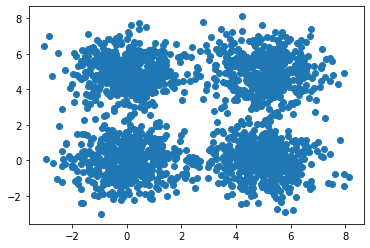

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [ ]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        #### MY CODE HERE ####
        self.X_fit_ = X
        # Initialize the prototype
        self.centroids = X[np.random.choice(np.arange(X.shape[0]), size=self.n_clusters, replace=False)]

        for i in range(self.max_iter):
          # stop conditions
          if i > 0:
            # if no change of cluster occurs there is convergence
            if (np.array_equal(self.centroids ,self.centroids_history[-1])):
              break

          # Assign every sample x_i to its cloest protptype
          labels = self._get_labels(X)

          # Save to self.labels_history & self.centroids_history
          self.labels_history.append(labels)
          self.centroids_history.append(self.centroids)

          # Calculate the cost and save to self.costs
          cost = self._calculate_cost(X)
          self.costs.append(cost)

          # Update the protptypes
          self.centroids = self._get_centroids(X, labels)

        # store the final labels & store the final centroids.
        self.labels_ = labels
        self.centroids = self._get_centroids(X, labels)
        #### MY CODE HERE ####

    def predict(self, X):
         #### MY CODE HERE ####
        return self._get_labels(X)
        #### MY CODE HERE ####

    def _get_distances(self, X):
        #### MY CODE HERE ####
        return np.sqrt(np.sum((X[:, np.newaxis] - self.centroids)**2, axis=-1))
        #### MY CODE HERE ####

    def _get_labels(self, X):
        #### MY CODE HERE ####
        return np.argmin(self._get_distances(X), axis=-1)
        #### MY CODE HERE ####

    def _get_centroids(self, X, labels):
        #### MY CODE HERE ####
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points = X[labels == i]
            centroids[i] = np.mean(points, axis=0)
        return centroids
        #### MY CODE HERE ####

    def _calculate_cost(self, X):
        ### MY CODE HERE ####
        labels = self._get_labels(X)
        distances = self._get_distances(X)
        return np.sum((distances[np.arange(X.shape[0]), labels])**2)
        ### MY CODE HERE ####

Run the algorithm on the 2D dataset

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

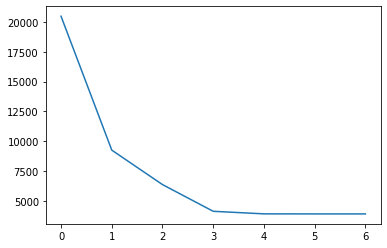

In [ ]:
costs = kmeans.costs
plt.plot(costs)
distances = kmeans._get_distances(X)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: <font color='red'>16669.499465961293</font><br>
3 clusters: <font color='red'>10140.814549891293</font><br>
4 clusters: <font color='red'>3991.153369256063</font><br>
6 clusters: <font color='red'>3393.14423013638</font><br>
8 clusters: <font color='red'>2772.813912221435</font><br>
10 clusters: <font color='red'>2397.9044030629475</font><br>
20 clusters: <font color='red'>1174.105985447285</font><br>

In [ ]:
# I added this section to get the finel cost of with n_clusters = 2, 3, 4, 6, 8, 10, 20

n_clusters_2 = 2
kmeans_2 = KMeans(n_clusters=n_clusters_2)
kmeans_2.fit(X)
costs_2 = kmeans_2.costs
print("2 clusters: " + str(costs_2[-1]))

n_clusters_3 = 3
kmeans_3 = KMeans(n_clusters=n_clusters_3)
kmeans_3.fit(X)
costs_3 = kmeans_3.costs
print("3 clusters: " + str(costs_3[-1]))

n_clusters_4 = 4
kmeans_4 = KMeans(n_clusters=n_clusters_4)
kmeans_4.fit(X)
costs_4 = kmeans_4.costs
print("4 clusters: " + str(costs_4[-1]))

n_clusters_6 = 6
kmeans_6 = KMeans(n_clusters=n_clusters_6)
kmeans_6.fit(X)
costs_6 = kmeans_6.costs
print("6 clusters: " + str(costs_6[-1]))

n_clusters_8 = 8
kmeans_8 = KMeans(n_clusters=n_clusters_8)
kmeans_8.fit(X)
costs_8 = kmeans_8.costs
print("8 clusters: " + str(costs_8[-1]))

n_clusters_10 = 10
kmeans_10 = KMeans(n_clusters=n_clusters_10)
kmeans_10.fit(X)
costs_10 = kmeans_10.costs
print("10 clusters: " + str(costs_10[-1]))

n_clusters_20 = 20
kmeans_20 = KMeans(n_clusters=n_clusters_20)
kmeans_20.fit(X)
costs_20 = kmeans_20.costs
print("20 clusters: " + str(costs_20[-1]))

2 clusters: 16423.348930679054
3 clusters: 9983.602562447095
4 clusters: 3926.1025325692917
6 clusters: 3336.409225108302
8 clusters: 2667.9951534399343
10 clusters: 2203.1369157055647
20 clusters: 1148.1359894688574


Now write a code that plots the clusters and the locations of the centroids at each iteration

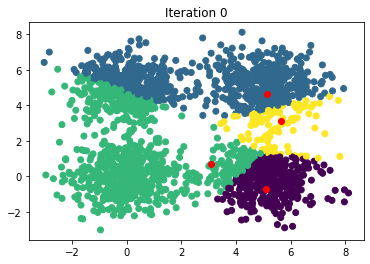

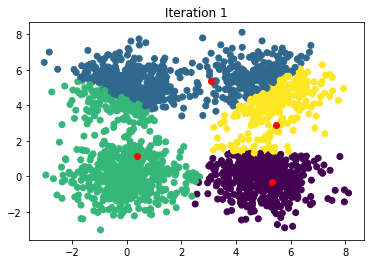

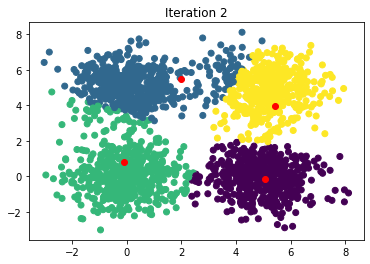

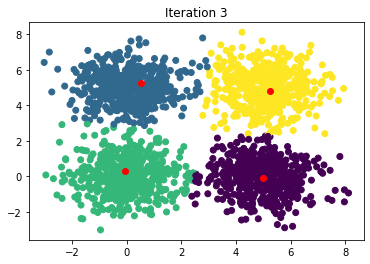

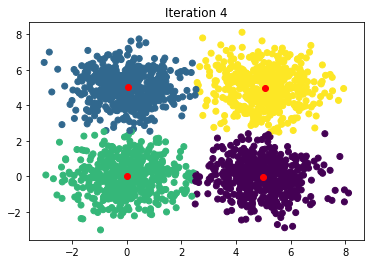

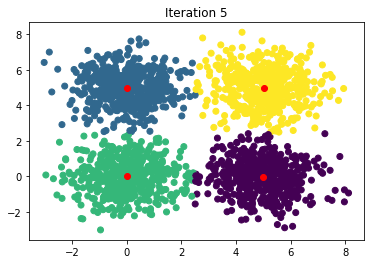

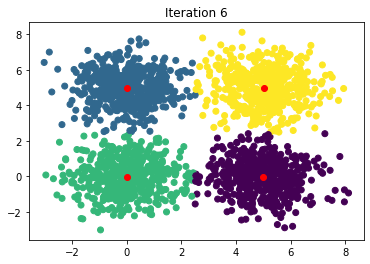

In [ ]:
### MY CODE HERE ####
labels_history = kmeans.labels_history # list
centroids_history = kmeans.centroids_history # list
i=0

for lables, centroids in zip (labels_history,centroids_history):
  y = [int(label) for label in lables]
  plt.scatter(X[:, 0], X[:, 1],c=y)
  c = centroids
  plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
  plt.title("Iteration " + str(i))
  plt.show()
  i = i + 1
### MY CODE HERE ####

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        #### MY CODE HERE ####
        #X_meaned = X - np.mean(X , axis = 0)
        # Calculating covariance matrix
        cov = np.cov(X, rowvar=False)

        # Calculating eigenvalues & eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # Sort eigenvalues & eigenvectors in descending order
        sorted_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_index]
        sorted_eigenvectors = eigenvectors[:, sorted_index]

        self.V = sorted_eigenvectors
        return self.V
        #### MY CODE HERE ####

    def transform(self, X, n_dimentions):
        #### MY CODE HERE ####
        #X_meaned = X - np.mean(X , axis = 0)
        return X @ self.V[:, :n_dimentions]
        #### MY CODE HERE ####

Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

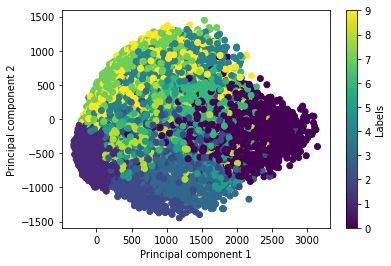

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

Text(0.5, 1.0, 'V*V.T')

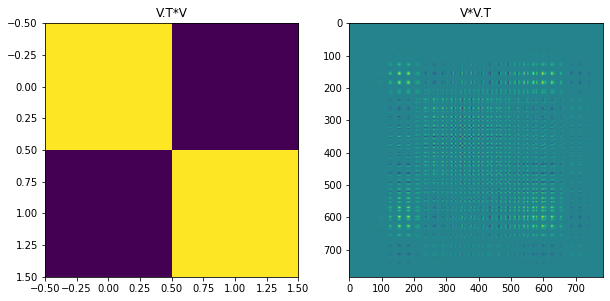

In [ ]:
#### MY CODE HERE ####
V_in_d_r = V[:, :2]
VTV = V_in_d_r.T @ V_in_d_r # 2*2
VVT = V_in_d_r @ V_in_d_r.T # 784*784

# create figure
fig = plt.figure(figsize=(10, 7))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(VTV)
plt.title("V.T*V")

fig.add_subplot(rows, columns, 2)
plt.imshow(VVT)
plt.title("V*V.T")

#### MY CODE HERE ####

Your Explanation:<br>
<font color='red'>
The matrix $V$ contains the top r eigenvectors that have the most variation in the data.<br>
$V^TV$ : The matrix $V^TV$ is in $\mathbb{R}^{r\times r}$, represents how the eigenvectors in V are related to each other. Since the columns of $V$ are orthonormal, the diagonals of $V^TV$ will be equal to 1 and other elements will be 0, as we can see in the printout of the matrix. This matrix is the orthogonal projection matrix of the eigenvectors of X.
<br> $VV^T$: The matrix $VV^T$ is in $\mathbb{R}^{d\times d}$, represents how the input data X is related to the eigenvectors in V. Which means it gives information on how the input data is projected to the new eigenvector space.This matrix is the orthogonal projection matrix of the data samples X in the eigenvector space.
<br>
</font>

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
    #### MY CODE HERE ####
    x = x @ V[:, :n_dimentions]
    return x @ V[:, :n_dimentions].T
    #### MY CODE HERE ####

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br>
<font color='red'>
Yes, the reconstruction is done in a good way, and the best reconstruction of the original image is the one made in 100 dimensions.</font>
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


Text(0.5, 1.0, 'Reconstructed Image (100D)')

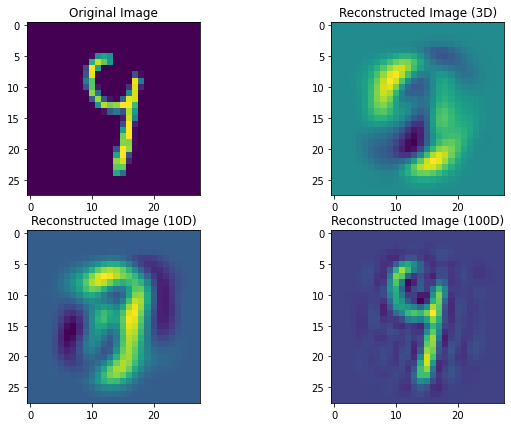

In [ ]:
#### MY CODE HERE ####
# get random image
index = np.random.randint(0, len(X))
random_image = X[index]

# 3d
reconstructed_3d = pca_reconstruction(random_image, 3)

# 10d
reconstructed_10d =  pca_reconstruction(random_image, 10)

# 100d
reconstructed_100d = pca_reconstruction(random_image, 100)

# reshape the images
random_image = random_image.reshape(28,28)
reconstructed_3d = reconstructed_3d.reshape(28,28)
reconstructed_10d = reconstructed_10d.reshape(28,28)
reconstructed_100d = reconstructed_100d.reshape(28,28)

# plot to the screen
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(random_image)
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(reconstructed_3d)
plt.title("Reconstructed Image (3D)")

fig.add_subplot(rows, columns, 3)
plt.imshow(reconstructed_10d)
plt.title("Reconstructed Image (10D)")

fig.add_subplot(rows, columns, 4)
plt.imshow(reconstructed_100d)
plt.title("Reconstructed Image (100D)")
#### MY CODE HERE ####